<a href="https://colab.research.google.com/github/sskamalapurkar/Suprvised_ML_Regression_capstone_project/blob/main/Ted_Talk_Views_Prediction_Sayali_Kamalapurkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

---





## <b>TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

##<b>Founded in 1984 by Richard Salman as a non-profit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

## <b>The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.





# **Introduction**

---



In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from numpy import math
from datetime import datetime
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#libraries for Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import time

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, KFold

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = '/content/drive/MyDrive/Supervised ML - Regression/data_ted_talks.csv'
DataFrame = pd.read_csv(file_path)
df = DataFrame.copy()

In [3]:
df.shape

(4005, 19)

In [4]:
df.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [6]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [7]:
#Listing all categorical columns
cat_cols = list(df.select_dtypes(include = 'object').columns)
print(f'Number of Categorical Columns: {len(cat_cols)}')
print(f'Categorical Columns: {cat_cols}')

Number of Categorical Columns: 15
Categorical Columns: ['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'recorded_date', 'published_date', 'event', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']


In [8]:
#Listing all numerical columns
num_cols = list(df.select_dtypes(exclude = 'object').columns)
print(f'Number of Continuous Columns: {len(num_cols)}')
print(f'Continuous Columns: {num_cols}')

Number of Continuous Columns: 4
Continuous Columns: ['talk_id', 'views', 'comments', 'duration']


In [9]:
#Statistics for Numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [10]:
#Statistics for Categorical columns
df.describe(include = 'object').T

,count,unique,top,freq
title,4005,4005,Averting the climate crisis,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


In [11]:
#checking for duplicates
len(df[df.duplicated()])

0

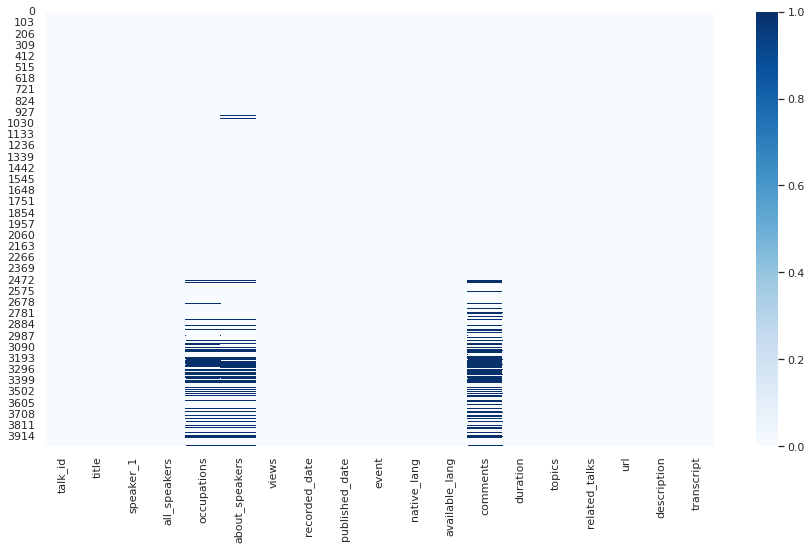

In [12]:
#Plotting Heatmap to see columns having null values
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isna(),cmap='Blues')

In [13]:
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [14]:
df['occupations'].fillna('other', inplace = True)
df['comments'].fillna(df['comments'].mean(), inplace = True)
df.drop('about_speakers', axis = 1, inplace = True)
df.isna().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      4
occupations       0
views             0
recorded_date     1
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [15]:
df['published_date'] = pd.to_datetime(df['published_date'])

In [16]:
df['published_year'] = df['published_date'].dt.year
df['published_month'] = df['published_date'].dt.month
df['published_weekday'] = df['published_date'].dt.day_of_week

In [17]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,...,comments,duration,topics,related_talks,url,description,transcript,published_year,published_month,published_weekday
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,...,272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,6,1
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,en,...,628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,6,1
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,en,...,124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,6,1
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,en,...,219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2006,6,1
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,en,...,4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006,6,1


# **EDA on features**

---



In [18]:
df['published_year'].value_counts()

2019    702
2018    477
2017    315
2012    303
2011    255
2013    242
2016    242
2014    240
2010    230
2015    220
2009    215
2020    211
2008    185
2007    119
2006     49
Name: published_year, dtype: int64

Text(0, 0.5, 'Number of Ted_talks published')

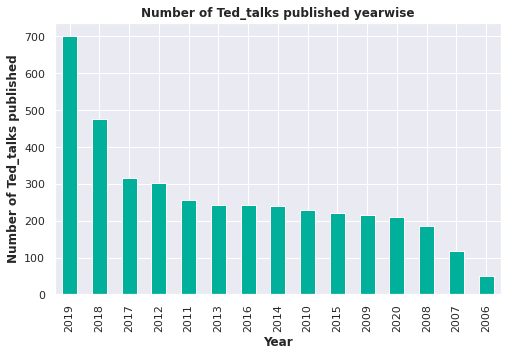

In [19]:
year_count = df['published_year'].value_counts()
year_count.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.title("Number of Ted_talks published yearwise", weight ='bold')
plt.xlabel("Year", weight='bold')
plt.ylabel('Number of Ted_talks published', weight='bold')

**2019 is the year in which highest number of Ted talks are published, followed by 2018 and 2017.** 

Text(0, 0.5, 'Average views')

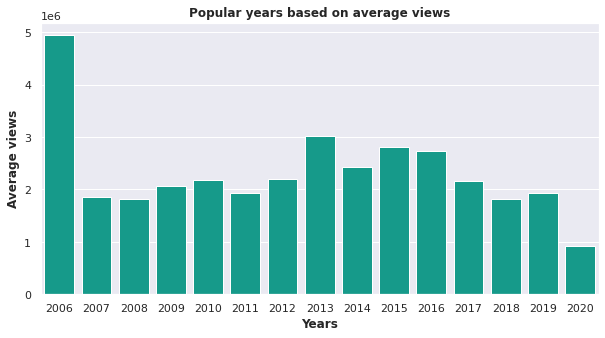

In [20]:
popular_year_acc_to_avg_views = df[['published_year','views']].groupby('published_year').agg({'views' : 'mean'})
popular_year_acc_to_avg_views.reset_index(inplace = True)
plt.figure(figsize=(10,5))
plt.title('Popular years based on average views', weight = 'bold')
sns.barplot(data = popular_year_acc_to_avg_views, x='published_year',y='views', color = '#00b09b')
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Average views", weight = 'bold')

**Based on target variable ( Views ), 2006 is the year having maximum average views.**

In [21]:
df['published_month'].value_counts()

4     423
3     419
2     412
10    350
1     348
9     347
5     312
6     310
11    305
7     278
12    265
8     236
Name: published_month, dtype: int64

Text(0, 0.5, 'Number of Ted_talks published')

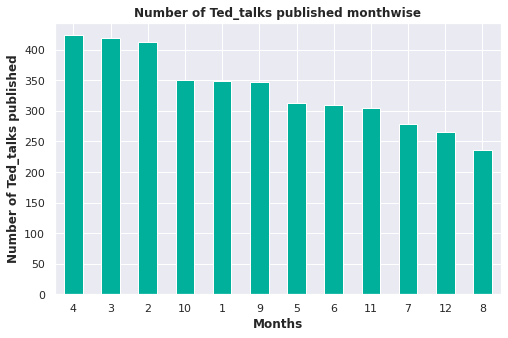

In [22]:
month_count = df['published_month'].value_counts()
month_count.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Number of Ted_talks published monthwise", weight ='bold')
plt.xlabel("Months", weight='bold')
plt.ylabel('Number of Ted_talks published', weight='bold')

**Highest number of ted talks are published in April, followed by March and February.**

Text(0, 0.5, 'Average views')

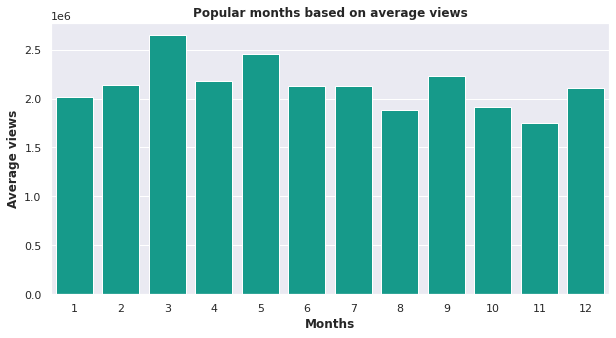

In [23]:
popular_month_acc_to_avg_views = df[['published_month','views']].groupby('published_month').agg({'views' : 'mean'})
popular_month_acc_to_avg_views.reset_index(inplace = True)
plt.figure(figsize=(10,5))
plt.title('Popular months based on average views', weight = 'bold')
sns.barplot(data = popular_month_acc_to_avg_views, x='published_month',y='views', color = '#00b09b')
plt.xlabel("Months", weight = 'bold')
plt.ylabel("Average views", weight = 'bold')

**Based on target variable ( Views ), March is the most popular month to publish the Ted talks, followed by May and September.**

In [24]:
df['published_weekday'].value_counts()

1    857
3    832
4    789
0    727
2    703
6     55
5     42
Name: published_weekday, dtype: int64

Text(0, 0.5, 'Number of Ted_talks published')

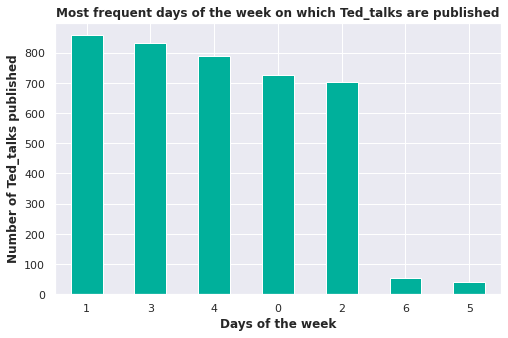

In [25]:
day_count = df['published_weekday'].value_counts()
day_count.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Most frequent days of the week on which Ted_talks are published", weight ='bold')
plt.xlabel("Days of the week", weight='bold')
plt.ylabel('Number of Ted_talks published', weight='bold')

**As we can see, most of the Ted talks are published on Tuesday, followed by Thursday and Friday.**

Text(0, 0.5, 'Average views')

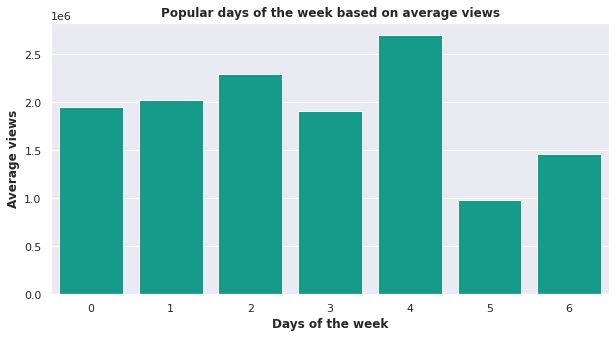

In [26]:
popular_day_of_the_week_acc_to_avg_views = df[['published_weekday','views']].groupby('published_weekday').agg({'views' : 'mean'})
popular_day_of_the_week_acc_to_avg_views.reset_index(inplace = True)
plt.figure(figsize=(10,5))
plt.title('Popular days of the week based on average views', weight = 'bold')
sns.barplot(data = popular_day_of_the_week_acc_to_avg_views, x='published_weekday',y='views', color = '#00b09b')
plt.xlabel("Days of the week", weight = 'bold')
plt.ylabel("Average views", weight = 'bold')

**But, if we analyse based on our target variable ( Views ), then Ted talks published on Friday has highest number of views compared to the other days of the week.**

In [27]:
top_Ted_talks_titles_speakers = df.nlargest(10, 'views')
top_Ted_talks_titles_speakers_df = top_Ted_talks_titles_speakers[['title','speaker_1','views']]
top_Ted_talks_titles_speakers_df

,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833
1724,How to speak so that people want to listen,Julian Treasure,41504331
2108,Inside the mind of a master procrastinator,Tim Urban,37976820
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546
2724,My philosophy for a happy life,Sam Berns,33691484
1898,The next outbreak? We're not ready,Bill Gates,33521780


**"Do schools kill creativity?" by Sir Ken Robinson, has highest number of views. This Ted talk is most popular based on number of views.**

In [28]:
top_speakers = df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
top_speakers

,views
speaker_1,
Alex Gendler,117619583
Sir Ken Robinson,84380518
James Veitch,78843641
Simon Sinek,62661183
Brené Brown,61285977
Bill Gates,57107176
Amy Cuddy,57074270
Julian Treasure,54799681
Hans Rosling,39871561


Text(0, 0.5, 'Sum of number of views')

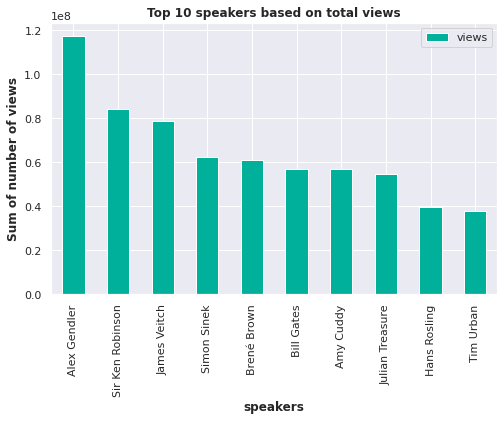

In [29]:
top_speakers.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.title("Top 10 speakers based on total views", weight = 'bold')
plt.xlabel("speakers", weight = 'bold')
plt.ylabel("Sum of number of views", weight = 'bold')

**These are the Top 10 Ted talk speakers according to the total views. Here we can see that, Alex Gendler is the most popular speaker.**

In [30]:
top_speakers_based_on_avg_views = df.groupby('speaker_1').agg({'views' : 'mean'}).nlargest(10,['views'])
top_speakers_based_on_avg_views

,views
speaker_1,
Amy Cuddy,57074270.0
James Veitch,39421820.5
Tim Urban,37976820.0
Cameron Russell,33874546.0
Sam Berns,33691484.0
Robert Waldinger,32396714.0
Simon Sinek,31330591.5
Mary Roach,30977634.0
Brené Brown,30642988.5


Text(0, 0.5, 'Average views')

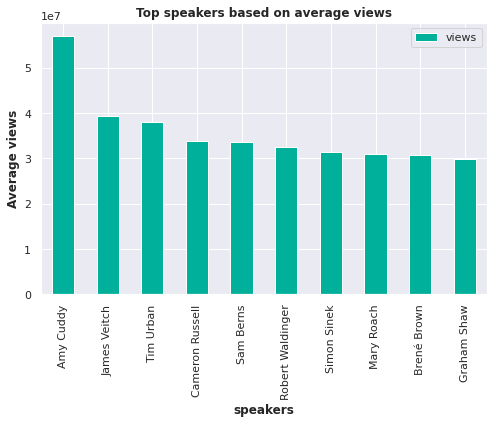

In [31]:
top_speakers_based_on_avg_views.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.title("Top speakers based on average views", weight = 'bold')
plt.xlabel("speakers", weight = 'bold')
plt.ylabel("Average views", weight = 'bold')

**Instead of total count of views, if we take average views, that is total views for the speaker divided by number of talks given by the speaker, we could see Amy Cuddy is the popular speaker based on average views.**

In [32]:
top_events = df.groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
top_events

,views
event,
TED-Ed,1145357780
TED2015,247702961
TED2014,240295871
TEDGlobal 2013,235410234
TED2017,227847725
TED2016,227358612
TED2013,225967516
TED2012,197746106
TED2018,196346377


Text(0, 0.5, 'Total views')

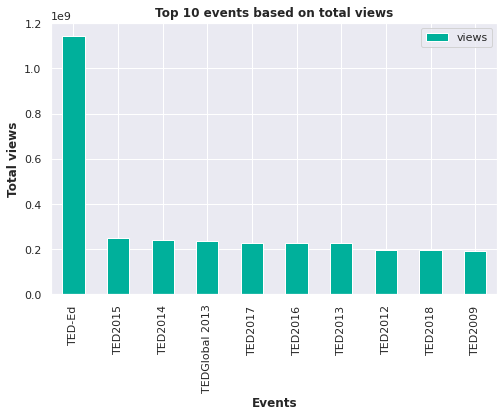

In [33]:
top_events.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.title("Top 10 events based on total views", weight = 'bold')
plt.xlabel("Events", weight = 'bold')
plt.ylabel("Total views", weight = 'bold')

**Based on total views, TED-Ed is the most popular event as we can see in above barplot. All the other 9 events have only one fourth of the views compared to TED-Ed event.**

Text(0, 0.5, 'Number of views')

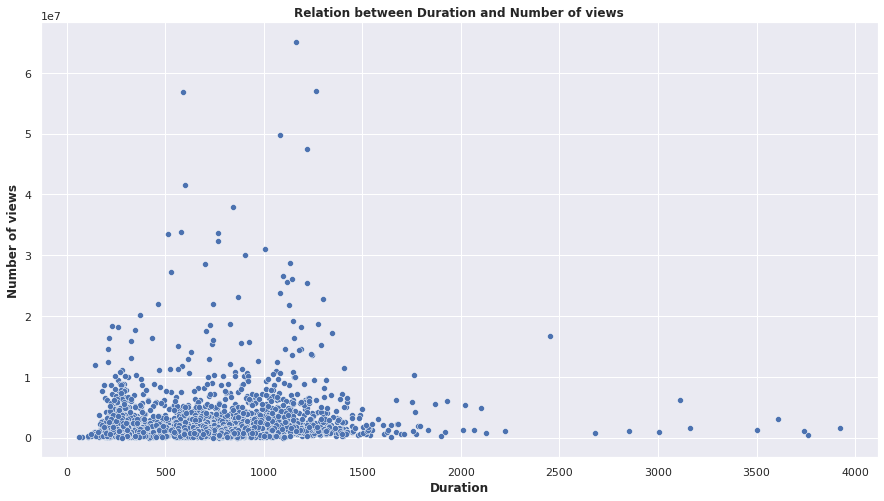

In [34]:
sns.scatterplot(data = df, x='duration', y='views')
plt.title("Relation between Duration and Number of views", weight = 'bold')
plt.xlabel("Duration", weight = 'bold')
plt.ylabel("Number of views", weight = 'bold')

**If the duration of the Ted talk is very high, then it is more likely to have very less number of views for those respective Ted talks.**

Text(0, 0.5, 'Number of Views')

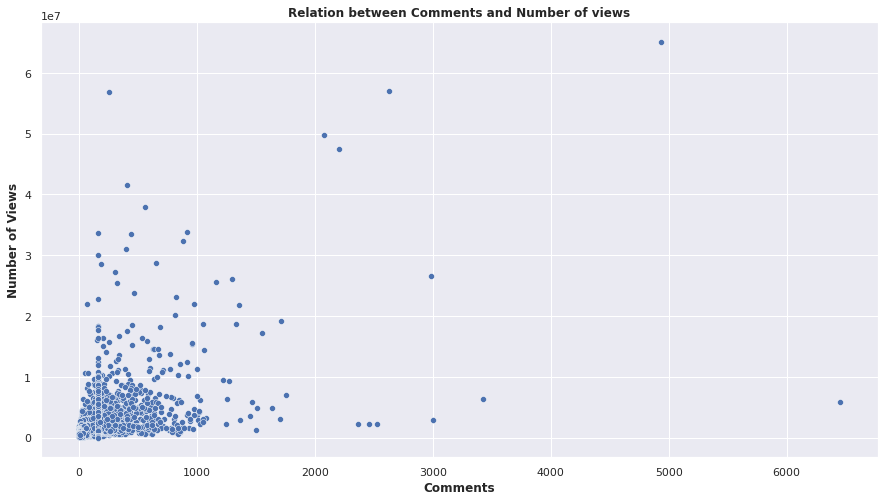

In [35]:
sns.scatterplot(data = df, x='comments', y='views')
plt.title("Relation between Comments and Number of views", weight = 'bold')
plt.xlabel("Comments", weight = 'bold')
plt.ylabel("Number of Views", weight = 'bold')

**Here, we can say that the Comments and Views have almost linear relationship.**

Text(0, 0.5, 'Number of Ted_talks published')

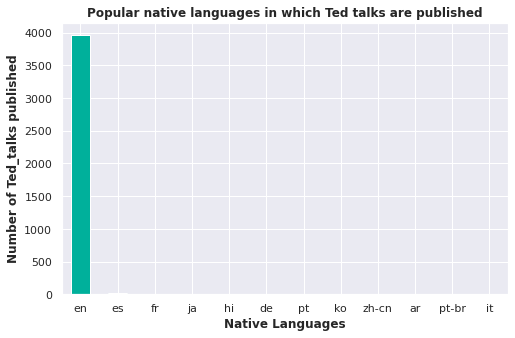

In [36]:
native_lang_count = df['native_lang'].value_counts()
native_lang_count.plot(kind = 'bar', color = '#00b09b',figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Popular native languages in which Ted talks are published", weight ='bold')
plt.xlabel("Native Languages", weight='bold')
plt.ylabel('Number of Ted_talks published', weight='bold')

**Almost all but few Ted talks are published in English language.**

Text(0, 0.5, 'Average views')

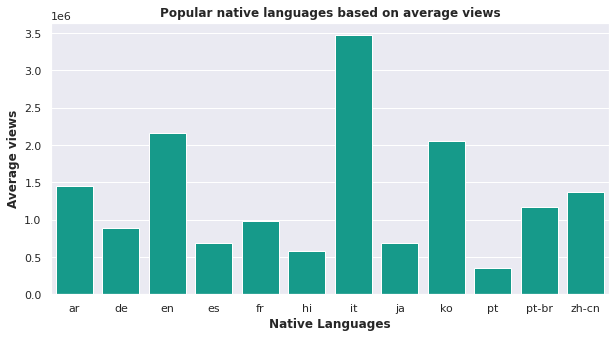

In [37]:
popular_native_lang_acc_to_avg_views = df[['native_lang','views']].groupby('native_lang').agg({'views' : 'mean'})
popular_native_lang_acc_to_avg_views.reset_index(inplace = True)
plt.figure(figsize=(10,5))
plt.title('Popular native languages based on average views', weight = 'bold')
sns.barplot(data = popular_native_lang_acc_to_avg_views, x='native_lang',y='views', color = '#00b09b')
plt.xlabel("Native Languages", weight = 'bold')
plt.ylabel("Average views", weight = 'bold')

**Based on average views according to number of videos published in the respective native languages, we can see that "it" language videos has highest average views, followed by "en" (English) and "ko" (Korean).**

In [38]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 words in the combination of all titles.


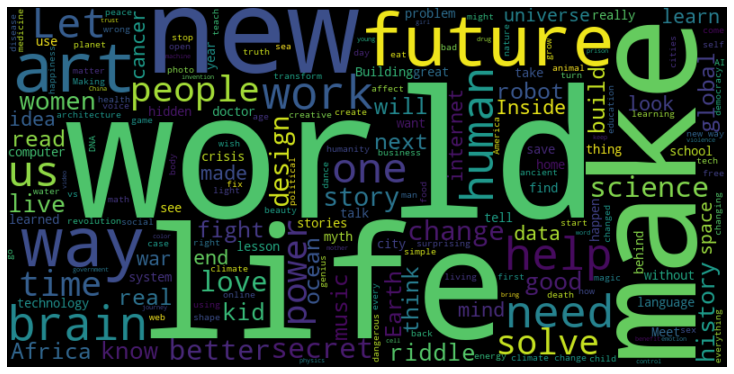

In [40]:
#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#000000", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (10,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**From above wordcloud, it can be easily observed that World, life, new, future, make, way, help, brain, need, solve,work, etc are the frequent words in the title of the Ted talks.**

There are 404126 words in the combination of all topics.


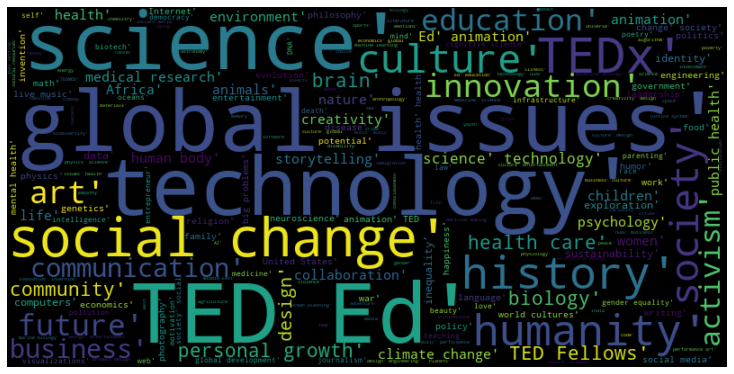

In [148]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#000000", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**A good number of Ted talks are published on the topics like - global issues, technology, TED-Ed, science, social change, history, humanity, TEDx, society, innovation, etc.**

There are 107517 words in the combination of all occupations.


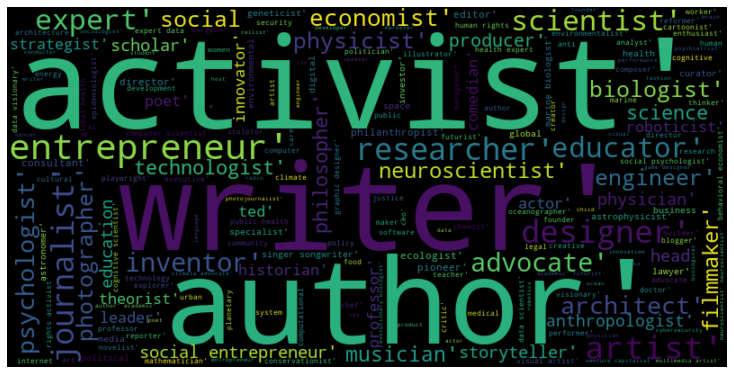

In [149]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(occupations for occupations in df.occupations.astype(str))
print ("There are {} words in the combination of all occupations.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#000000", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**We can see in above wordcloud of occupations that many speakers are activists, writers, authors, entrepreneur, designer, researcher, educator, journalist etc.**

There are 647690 words in the combination of all available_lang.


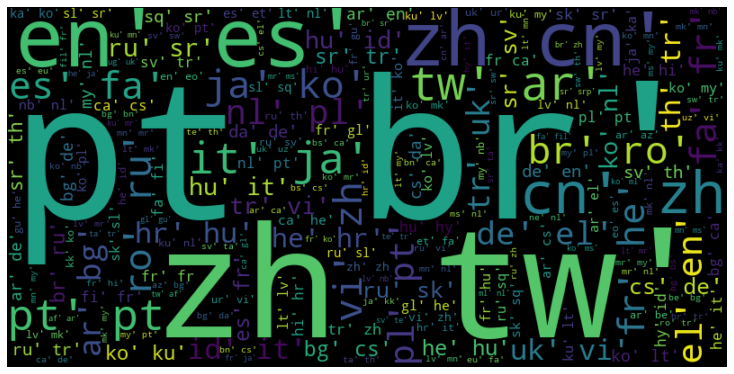

In [150]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(available_lang for available_lang in df.available_lang.astype(str))
print ("There are {} words in the combination of all available_lang.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#000000", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**Many Ted talks are available in languages such as, "pt", "br", "zh", "tw", "en", "es", "cn",etc.**

There are 1139613 words in the combination of all related_talks.


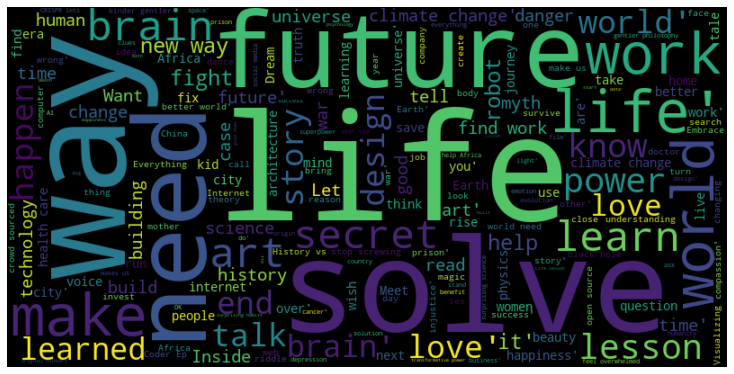

In [151]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(related_talks for related_talks in df.related_talks.astype(str))
print ("There are {} words in the combination of all related_talks.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="#000000", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**related_talk column contains dictionary of all related talks to the corresponding Ted talk, with talk_id as keys and title as values.**


**future, life, need, way, make, solve, brain, work, learn, world, etc are the words that are coming many times in tiles of the related talks.**

Skewness: 8.185744
Kurtosis: 98.737918


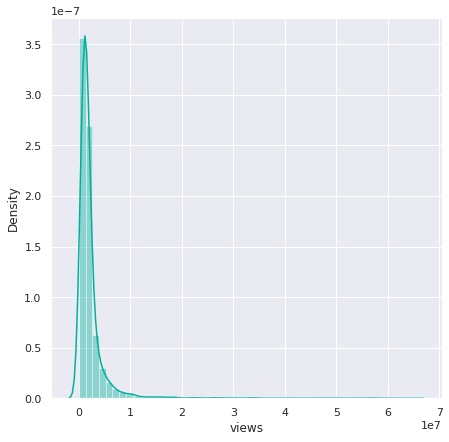

In [152]:
# Dependent variable 'Views'
plt.figure(figsize=(7,7))
sns.distplot(df['views'],color="#00b09b")

print("Skewness: %f" % df['views'].skew())
print("Kurtosis: %f" % df['views'].kurt())

Skewness: 1.185608
Kurtosis: 6.849223


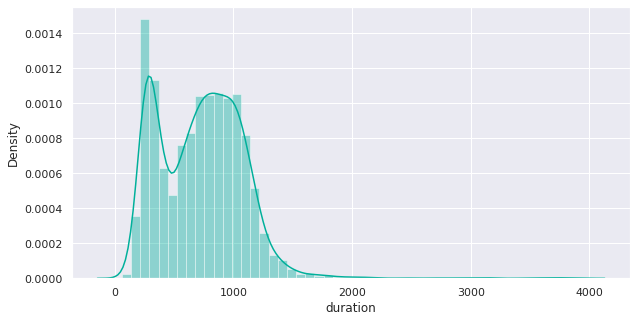

In [153]:
# Distplot to show distribution of duration column.

plt.figure(figsize=(10,5))
sns.distplot(df['duration'],color="#00b09b")
print("Skewness: %f" % df['duration'].skew())
print("Kurtosis: %f" % df['duration'].kurt())

Skewness: 9.692667
Kurtosis: 171.546902


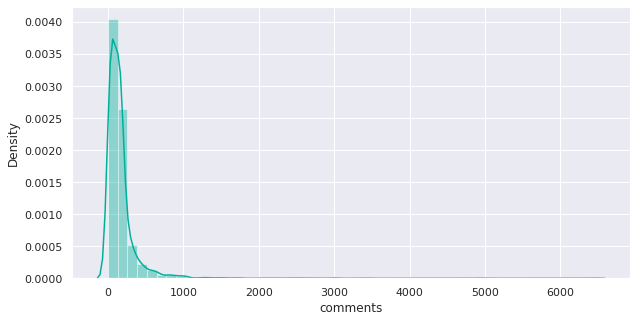

In [154]:
# Distplot to show distribution of comments column.

plt.figure(figsize=(10,5))
sns.distplot(df['comments'],color="#00b09b")
print("Skewness: %f" % df['comments'].skew())
print("Kurtosis: %f" % df['comments'].kurt())

# **Feature Engineering** 

---



Firstly, we will do feature engineering on speaker_1 column. For that, we will define a function which will return the average views for the corresponding speaker.

In [155]:
def speaker_avg_views(speaker):
  avg=df.loc[df['speaker_1']==speaker,['views']].mean()
  return avg

In [ ]:
# Doing target encoding on speaker_1 column
df['speaker_1_avg_views']=df['speaker_1'].apply(speaker_avg_views)

In [ ]:
# Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'], color="#00b09b")

Next, we will do feature engineering on events column. First we will find out number of unique events in the dataset.

In [ ]:
# Finding the unique events from the event column.
event_list=list(df.event.unique())
len(event_list)

Further, we are going to define the function which will return average views for the particular event.

In [ ]:
def event_avg_views(event):
  avg=df.loc[df['event']==event,['views']].mean()
  return avg

In [ ]:
# Doing target encoding on events column.
df['event_wise_avg_views']=df['event'].apply(event_avg_views)

In [ ]:
# Plotting the distplot of event_wise_avg_views
sns.distplot(df['event_wise_avg_views'], color="#00b09b")

Let us do feature engineering on topics column, since topics column contains a list of topics related to the respective Ted talks.

In [ ]:
df['topics'][0]

In [ ]:
df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

We will take count of those topics as a new numerical column "num_of_tags". 

In [ ]:
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

In [ ]:
# Distplot to show distribution of num_of_tags column.

plt.figure(figsize=(10,5))
sns.distplot(df['num_of_tags'],color="#00b09b")
print("Skewness: %f" % df['num_of_tags'].skew())
print("Kurtosis: %f" % df['num_of_tags'].kurt())

Let us do feature engineering on available_lang column, as it contains a list of languages in which the corresponding Ted talk is available.

In [ ]:
df['available_lang'][0]

In [ ]:
df['available_lang'] = df['available_lang'].apply(eval)
len(df['available_lang'][0])

We are going to take count of those available languages in new column "num_of_lang".

In [ ]:
df['num_of_lang'] = df['available_lang'].apply(lambda x: len(x))
df['num_of_lang']

In [ ]:
# Distplot to show distribution of num_of_lang column.

plt.figure(figsize=(10,5))
sns.distplot(df['num_of_lang'],color="#00b09b")
print("Skewness: %f" % df['num_of_lang'].skew())
print("Kurtosis: %f" % df['num_of_lang'].kurt())

Also, instead of dealing with published_year we will create new numerical column as video age.

In [ ]:
df['video_age']=2022-df['published_year']
df['video_age'][0]

# **Data Cleaning and Outlier treatment**

---



In [ ]:
df.columns

First we will drop some not so important columns.

In [ ]:
df.drop(columns=['talk_id', 'speaker_1', 'event', 'title', 'all_speakers', 'occupations', 'recorded_date', 'published_date','topics',
        'related_talks','transcript','description', 'url','native_lang', 'available_lang'],inplace=True)      

In [ ]:
df.isnull().sum()

We have already dealt with missing values. Now, we will work on outliers.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [ ]:
for i in ['comments','duration','num_of_lang','num_of_tags','views','speaker_1_avg_views', 'event_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

Let us check again for outliers.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [ ]:
df.head()

# **Feature Selection**

---



Let us separate dependent variable ( Views ) and independent variables.

In [ ]:
#separating the dependent and independent variables
y=df['views']
X=df.drop(columns='views')

In [ ]:
# Calculating f scores of each features
f_scores = f_regression(X, y)

In [ ]:
# Let's plot the f scores of independent variable.

p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='#00b09b',figsize=(18,8))
plt.title('P-value scores for numerical features')
plt.show()

In [ ]:
#create a list of important features
imp_features=[]
for i in range(len(f_scores[1])):
    if p_values[i]<0.05:
        imp_features.append(X.columns[i])

imp_features


In [ ]:
len(imp_features)

In [ ]:
X = X[imp_features]

In [ ]:
X.head()

In [ ]:
correlation = X.corr()

In [ ]:
sns.heatmap(correlation, annot = True)

There are no highly correlated features. We are good to go for Model Implementation.

# **Train Test Split**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

In [ ]:
#create a linear regression model
model = LinearRegression()

#fit the model
model.fit(X_train,y_train)

#predict the values of train
y_pred_train=model.predict(X_train)

#predicted values of test
y_pred_test=model.predict(X_test)


In [ ]:
#checking accuracy of the model

#print mean absolute error for train
print('Mean absolute error for train:',mean_absolute_error(y_train,y_pred_train))

#print mean absolute error for test
print('Mean absolute error for test:',mean_absolute_error(y_test,y_pred_test))

#print mean squared error for train
print('Mean squared error for train:',mean_squared_error(y_train,y_pred_train))

#print mean squared error for test
print('Mean squared error for test:',mean_squared_error(y_test,y_pred_test))

#print r2 score for train
print('r2 score for train:',r2_score(y_train,y_pred_train))

#print r2 score for test
print('r2 score for test:',r2_score(y_test,y_pred_test))

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(['Prediction', 'Actual'])
plt.xlabel('No. of Test data')
plt.show()

# **Random Forest Regressor**

---



In [ ]:
#create a random forest regressor
model = RandomForestRegressor(criterion='mae')

#fit the model
model.fit(X_train,y_train)

#predict the values of train
y_pred_train=model.predict(X_train)

#predicted values of test
y_pred_test=model.predict(X_test)

In [ ]:
#checking accuracy of the model

#print mean absolute error for train
print('Mean absolute error for train:',mean_absolute_error(y_train,y_pred_train))

#print mean absolute error for test
print('Mean absolute error for test:',mean_absolute_error(y_test,y_pred_test))

#print mean squared error for train
print('Mean squared error for train:',mean_squared_error(y_train,y_pred_train))

#print mean squared error for test
print('Mean squared error for test:',mean_squared_error(y_test,y_pred_test))

#print r2 score for train
print('r2 score for train:',r2_score(y_train,y_pred_train))

#print r2 score for test
print('r2 score for test:',r2_score(y_test,y_pred_test))

***Hyper parameter tuning using RandomizedSearchCV***

In [ ]:
#define parameters for the random forest model
param_dict={'n_estimators':[30,50,80,100,120,150],
            'max_depth':[4,6,8,10,12],
            'min_samples_split':[50,100,150,200],
            'min_samples_leaf':[10,30,50,70]}

#create a random forest model
rf_model=RandomForestRegressor(criterion='mae')

#create a random search cv object
rf_random=RandomizedSearchCV(rf_model, param_dict, verbose=0, cv=5)

#fit the model
rf_random.fit(X_train,y_train)


In [ ]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_

In [ ]:
rf_optimal_model

In [ ]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

In [ ]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(['Prediction', 'Actual'])
plt.xlabel('No. of Test data')
plt.show()

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances, color = '#00b09b')

plt.xlabel('Features', weight = 'bold')
plt.ylabel('Importances', weight = 'bold')

plt.title('Feature importance score w.r.t. Random Forest Regressor model', weight = 'bold')
plt.show() 

# **XGBoost Regressor Model**

---



In [ ]:
#create a XGBoost regressor
model = XGBRegressor(learning_rate=0.1)

#fit the model
model.fit(X_train,y_train)

#predict the values of train
y_pred_train=model.predict(X_train)

#predicted values of test
y_pred_test=model.predict(X_test)

In [ ]:
#checking accuracy of the model

#print mean absolute error for train
print('Mean absolute error for train:',mean_absolute_error(y_train,y_pred_train))

#print mean absolute error for test
print('Mean absolute error for test:',mean_absolute_error(y_test,y_pred_test))

***Hyper parameter tuning using RandomizedSearchCV***

In [ ]:
#define parameters for the XGBoost Regressor model
param_dict={'n_estimators':[30,50,80,100],
            'max_depth':[4,6,8],
            'min_samples_split':[50,100,150],
            'min_samples_leaf':[10,30,50]}

In [ ]:
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

In [ ]:
# Let's see which set of hyperparameters are optimal

xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

In [ ]:
# Calculating MAE for training and test set.

y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

In [ ]:
# Making predictions for test data and also calculating r2_score.

y_hat = xgb_optimal_model.predict(X_test)
print(f'r_squared value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

# Calculating Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(['Prediction', 'Actual'])
plt.xlabel('No. of Test data')
plt.show()

In [ ]:
# Barplot showing important features w.r.t. XGBregressor model

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances, color = '#00b09b')

plt.xlabel('Features', weight = 'bold')
plt.ylabel('Importances', weight = 'bold')

plt.title('Feature importance score w.r.t. XGBoost Regressor model', weight = 'bold')
plt.show()

# **ExtraTrees Regressor Model**

---



In [ ]:
et = ExtraTreesRegressor(criterion='mae')
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

***Hyper parameter tuning using RandomizedSearchCV***

In [ ]:
#define parameters for the ExtraTrees Regressor model
param_dict={'n_estimators':[50,80,100],
            'max_depth':[4,6,8],
            'min_samples_split':[50,100,150],
            'min_samples_leaf':[40,50]}

In [ ]:
# Creating an instance of the Extratrees regressor
et_model = ExtraTreesRegressor(criterion='mae')

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

In [ ]:
et_optimal_model = et_random.best_estimator_
et_optimal_model

In [ ]:
y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

In [ ]:
# make predictions for test data
y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {et_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(['Prediction', 'Actual'])
plt.xlabel('No. of Test data')
plt.show()

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': et.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances, color = '#00b09b')

plt.xlabel('Features', weight = 'bold')
plt.ylabel('Importances', weight = 'bold')

plt.title('Feature importance score w.r.t. ExtraTreesRegressor model')
plt.show()